In [1]:
#https://www.kaggle.com/c/dogs-vs-cats/
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from keras.callbacks import TensorBoard
from keras_tqdm import TQDMNotebookCallback

from keras import backend as K
K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Using TensorFlow backend.


In [2]:
tensorboard = TensorBoard(log_dir="./logs/{}".format(time()))

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 18002 images belonging to 2 classes.
Found 6999 images belonging to 2 classes.


In [4]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=[tensorboard,TQDMNotebookCallback()])


Epoch 1/50


125/125 [==============================] - 64s 510ms/step - loss: 0.7248 - acc: 0.5140 - val_loss: 0.6895 - val_acc: 0.5162
Epoch 2/50


125/125 [==============================] - 45s 364ms/step - loss: 0.6958 - acc: 0.5820 - val_loss: 0.6594 - val_acc: 0.5687
Epoch 3/50


125/125 [==============================] - 47s 374ms/step - loss: 0.6663 - acc: 0.6235 - val_loss: 0.6171 - val_acc: 0.6737
Epoch 4/50


125/125 [==============================] - 56s 451ms/step - loss: 0.6412 - acc: 0.6315 - val_loss: 0.6533 - val_acc: 0.5813
Epoch 5/50


125/125 [==============================] - 43s 345ms/step - loss: 0.6334 - acc: 0.6535 - val_loss: 0.5545 - val_acc: 0.7125
Epoch 6/50


125/125 [==============================] - 43s 347ms/step - loss: 0.6237 - acc: 0.6715 - val_loss: 0.5761 - val_acc: 0.6887
Epoch 7/50


125/125 [==============================] - 58s 464ms/step - loss: 0.6082 - acc: 0.6895 - val_loss: 0.5605 - val_acc: 0.7188
Epoch 8/50


125/125 [==============================] - 43s 343ms/step - loss: 0.6108 - acc: 0.6845 - val_loss: 0.6131 - val_acc: 0.6875
Epoch 9/50


125/125 [==============================] - 41s 325ms/step - loss: 0.6027 - acc: 0.6865 - val_loss: 0.6259 - val_acc: 0.6776
Epoch 10/50


125/125 [==============================] - 29s 234ms/step - loss: 0.5822 - acc: 0.7020 - val_loss: 0.5656 - val_acc: 0.7200
Epoch 11/50


125/125 [==============================] - 27s 217ms/step - loss: 0.5829 - acc: 0.7025 - val_loss: 0.5174 - val_acc: 0.7488
Epoch 12/50


125/125 [==============================] - 30s 241ms/step - loss: 0.5539 - acc: 0.7305 - val_loss: 0.5311 - val_acc: 0.7488
Epoch 13/50


125/125 [==============================] - 32s 256ms/step - loss: 0.5509 - acc: 0.7270 - val_loss: 0.4942 - val_acc: 0.7850
Epoch 14/50


125/125 [==============================] - 38s 302ms/step - loss: 0.5729 - acc: 0.7235 - val_loss: 0.4938 - val_acc: 0.7762
Epoch 15/50


125/125 [==============================] - 39s 310ms/step - loss: 0.5550 - acc: 0.7110 - val_loss: 0.5007 - val_acc: 0.7550
Epoch 16/50


125/125 [==============================] - 39s 311ms/step - loss: 0.5476 - acc: 0.7430 - val_loss: 0.4994 - val_acc: 0.7725
Epoch 17/50


125/125 [==============================] - 36s 285ms/step - loss: 0.5520 - acc: 0.7260 - val_loss: 0.5213 - val_acc: 0.7512
Epoch 18/50


125/125 [==============================] - 43s 345ms/step - loss: 0.5491 - acc: 0.7420 - val_loss: 0.4621 - val_acc: 0.7775
Epoch 19/50


125/125 [==============================] - 25s 197ms/step - loss: 0.5407 - acc: 0.7455 - val_loss: 0.5873 - val_acc: 0.7188
Epoch 20/50


125/125 [==============================] - 22s 172ms/step - loss: 0.5299 - acc: 0.7485 - val_loss: 0.6129 - val_acc: 0.6925
Epoch 21/50


125/125 [==============================] - 21s 169ms/step - loss: 0.5248 - acc: 0.7390 - val_loss: 0.4563 - val_acc: 0.7725
Epoch 22/50


125/125 [==============================] - 20s 162ms/step - loss: 0.5282 - acc: 0.7570 - val_loss: 0.4483 - val_acc: 0.8100
Epoch 23/50


125/125 [==============================] - 20s 161ms/step - loss: 0.5295 - acc: 0.7435 - val_loss: 0.4108 - val_acc: 0.8175
Epoch 24/50


125/125 [==============================] - 20s 161ms/step - loss: 0.5123 - acc: 0.7610 - val_loss: 0.4799 - val_acc: 0.7738
Epoch 25/50


125/125 [==============================] - 20s 163ms/step - loss: 0.5073 - acc: 0.7640 - val_loss: 0.4737 - val_acc: 0.7812
Epoch 26/50


125/125 [==============================] - 21s 164ms/step - loss: 0.5171 - acc: 0.7620 - val_loss: 0.4778 - val_acc: 0.7975
Epoch 27/50


125/125 [==============================] - 20s 162ms/step - loss: 0.5055 - acc: 0.7770 - val_loss: 1.0339 - val_acc: 0.6574
Epoch 28/50


125/125 [==============================] - 20s 161ms/step - loss: 0.4719 - acc: 0.7905 - val_loss: 0.4665 - val_acc: 0.8150
Epoch 29/50


125/125 [==============================] - 19s 152ms/step - loss: 0.5198 - acc: 0.7615 - val_loss: 0.5172 - val_acc: 0.7950
Epoch 30/50


125/125 [==============================] - 19s 155ms/step - loss: 0.5208 - acc: 0.7685 - val_loss: 0.4860 - val_acc: 0.7725
Epoch 31/50


125/125 [==============================] - 20s 157ms/step - loss: 0.5178 - acc: 0.7590 - val_loss: 0.4585 - val_acc: 0.7812
Epoch 32/50


125/125 [==============================] - 20s 159ms/step - loss: 0.4932 - acc: 0.7710 - val_loss: 0.4640 - val_acc: 0.7788
Epoch 33/50


125/125 [==============================] - 20s 157ms/step - loss: 0.4950 - acc: 0.7790 - val_loss: 0.4347 - val_acc: 0.8000
Epoch 34/50


125/125 [==============================] - 19s 153ms/step - loss: 0.5030 - acc: 0.7750 - val_loss: 0.4815 - val_acc: 0.7875
Epoch 35/50


125/125 [==============================] - 19s 154ms/step - loss: 0.5005 - acc: 0.7695 - val_loss: 0.4549 - val_acc: 0.7950
Epoch 36/50


125/125 [==============================] - 21s 167ms/step - loss: 0.4929 - acc: 0.7725 - val_loss: 0.4539 - val_acc: 0.7927
Epoch 37/50


125/125 [==============================] - 20s 156ms/step - loss: 0.4623 - acc: 0.7975 - val_loss: 0.4715 - val_acc: 0.7475
Epoch 38/50


125/125 [==============================] - 19s 149ms/step - loss: 0.5087 - acc: 0.7705 - val_loss: 0.4610 - val_acc: 0.7975
Epoch 39/50


125/125 [==============================] - 18s 148ms/step - loss: 0.4936 - acc: 0.7585 - val_loss: 0.4410 - val_acc: 0.8100
Epoch 40/50


125/125 [==============================] - 18s 147ms/step - loss: 0.5028 - acc: 0.7825 - val_loss: 0.4554 - val_acc: 0.8087
Epoch 41/50


125/125 [==============================] - 19s 150ms/step - loss: 0.5007 - acc: 0.7825 - val_loss: 0.5911 - val_acc: 0.7137
Epoch 42/50


125/125 [==============================] - 18s 148ms/step - loss: 0.4925 - acc: 0.7795 - val_loss: 0.4742 - val_acc: 0.8025
Epoch 43/50


125/125 [==============================] - 19s 148ms/step - loss: 0.4895 - acc: 0.7800 - val_loss: 0.4381 - val_acc: 0.8150
Epoch 44/50


125/125 [==============================] - 18s 148ms/step - loss: 0.4886 - acc: 0.7765 - val_loss: 0.4541 - val_acc: 0.8053
Epoch 45/50


125/125 [==============================] - 19s 149ms/step - loss: 0.4987 - acc: 0.7770 - val_loss: 0.3990 - val_acc: 0.8050
Epoch 46/50


125/125 [==============================] - 19s 156ms/step - loss: 0.4828 - acc: 0.7875 - val_loss: 0.4402 - val_acc: 0.7850
Epoch 47/50


125/125 [==============================] - 19s 148ms/step - loss: 0.4733 - acc: 0.7930 - val_loss: 0.4374 - val_acc: 0.8050
Epoch 48/50


125/125 [==============================] - 18s 148ms/step - loss: 0.4949 - acc: 0.7775 - val_loss: 0.4730 - val_acc: 0.8013
Epoch 49/50


125/125 [==============================] - 19s 149ms/step - loss: 0.4886 - acc: 0.7845 - val_loss: 0.5044 - val_acc: 0.7700
Epoch 50/50


125/125 [==============================] - 19s 148ms/step - loss: 0.4620 - acc: 0.7985 - val_loss: 0.4252 - val_acc: 0.8263



In [6]:
model.save_weights('second_try.h5')  # always save your weights after training or during training

In [3]:
model.load_weights('first_try.h5')

In [8]:
test_generator = test_datagen.flow_from_directory(
        'data/test',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=50,
        class_mode=None)  # since we use binary_crossentropy loss, we need binary labels

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = 1,verbose=True)

Found 12500 images belonging to 1 classes.
1/1 [==============================] - 4s 4s/step


In [9]:
predicted_class_indices =  [ np.around(x , decimals=0) for x in predict ]    #np.argmax(predict,axis=1)

In [10]:
labels = ['cat','dog']

In [11]:
predictions = [labels[int(k)] for k in predicted_class_indices]

In [12]:
filenames = filenames[:50]

In [13]:
results = pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

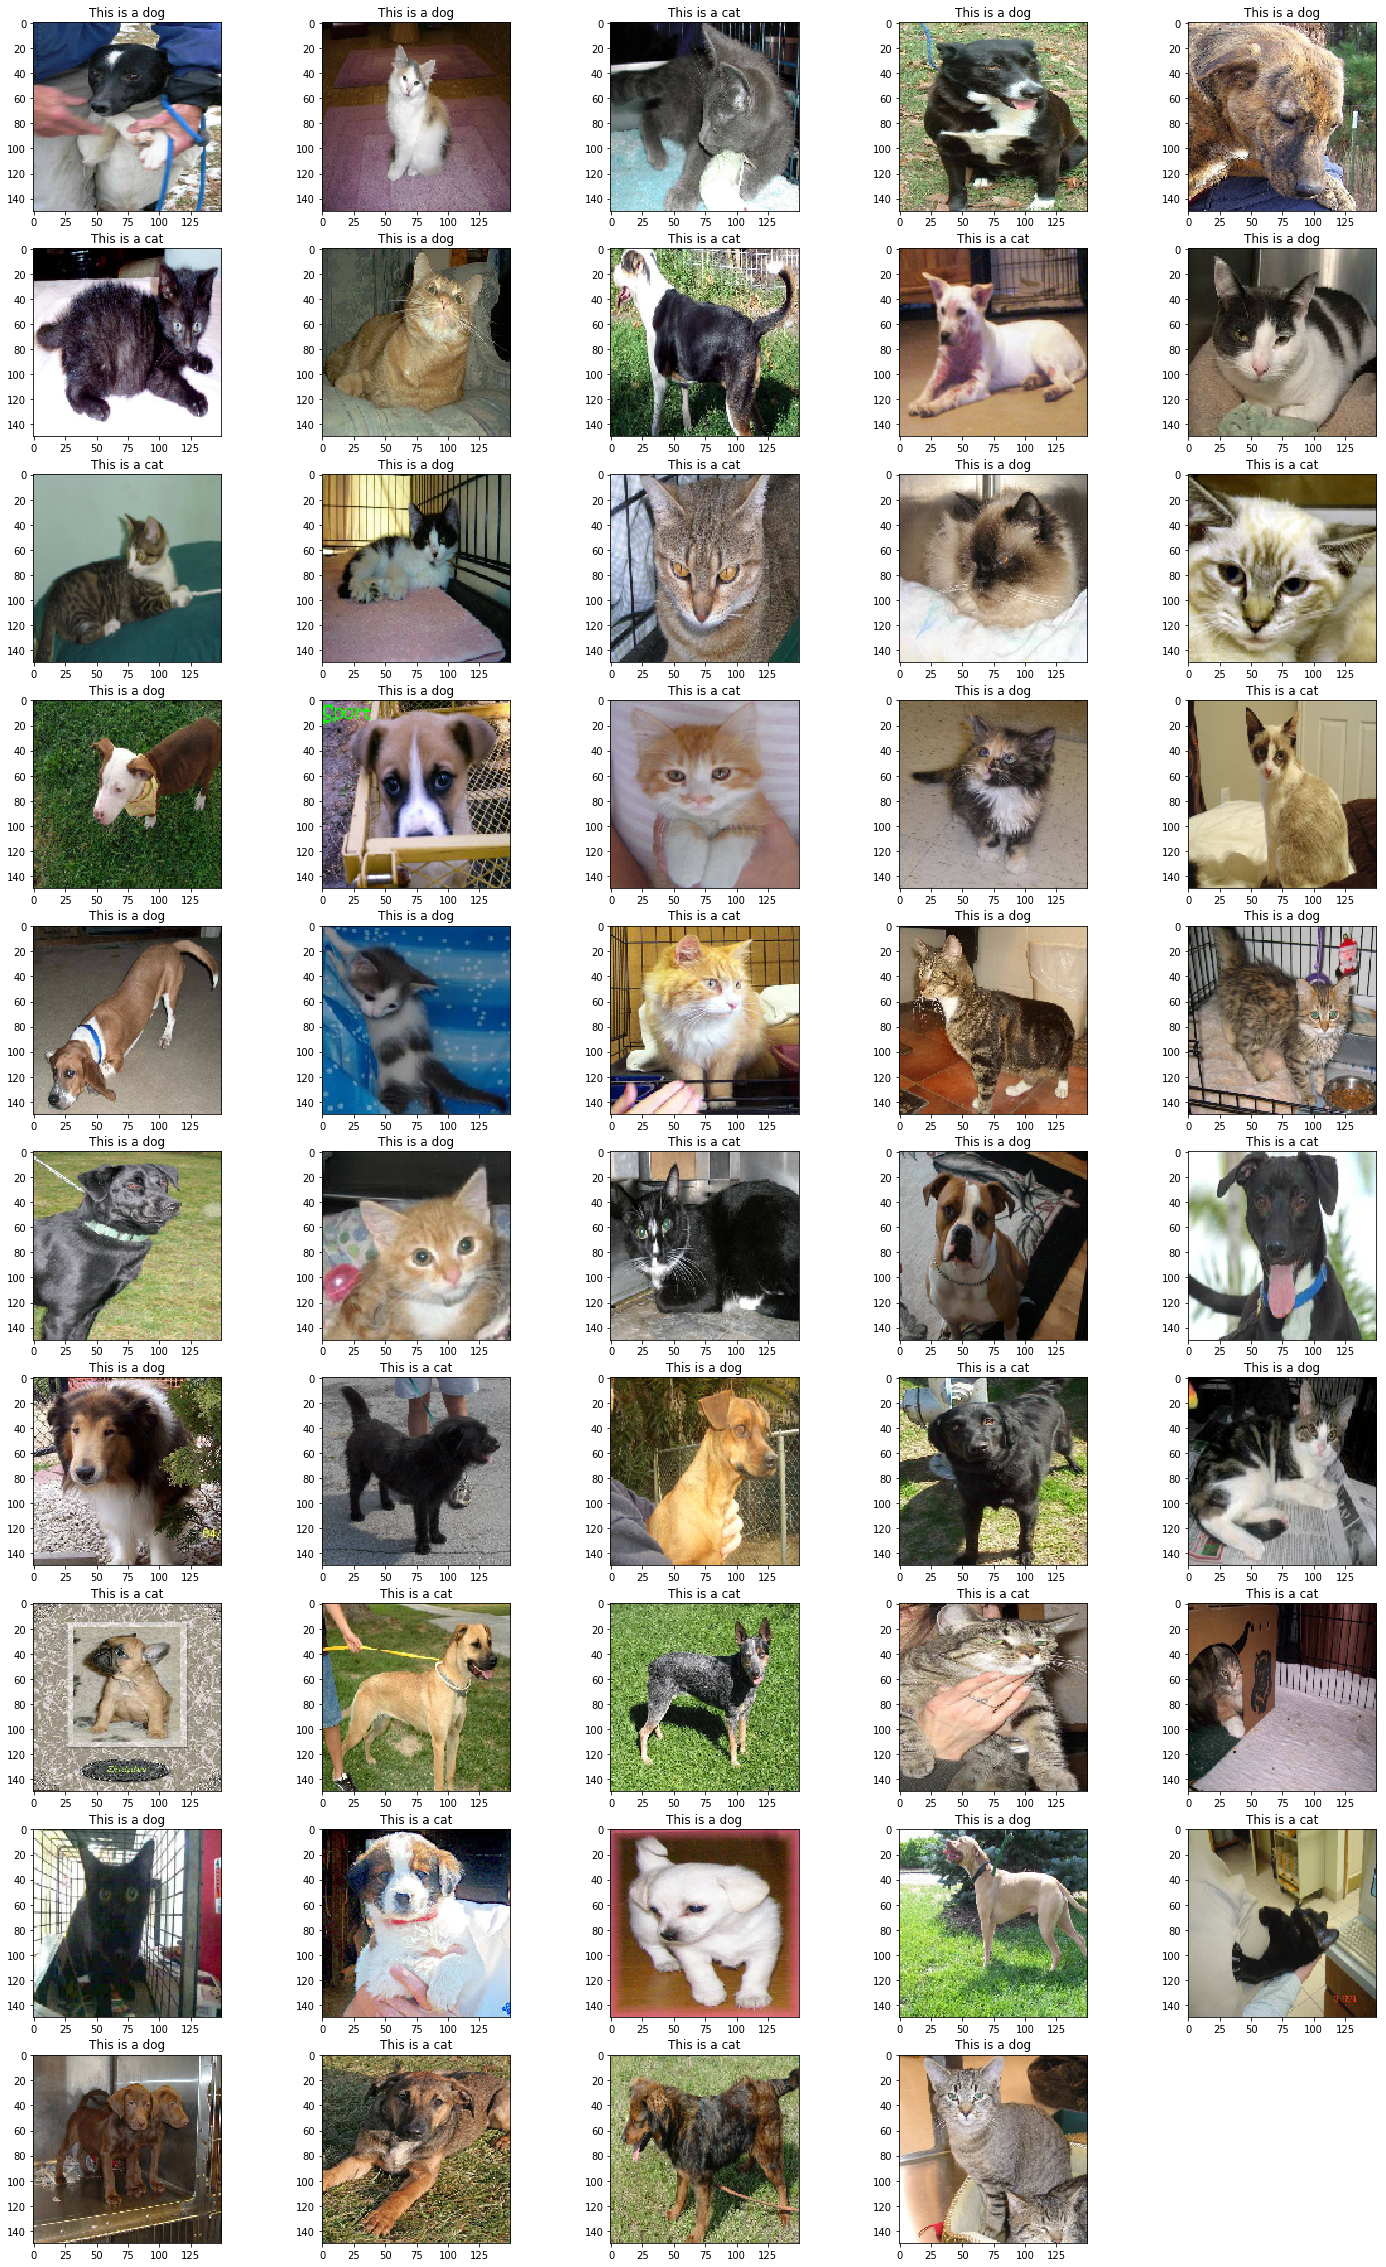

In [14]:
i = 0
columns = 5
plt.figure(figsize=(25,45))

for i in range(0, 49):
    img = load_img( './data/test/'+ results.iloc[i,0], target_size=(150, 150))
    plt.subplot(50 / columns + 1, columns, i + 1)
    plt.title('This is a ' + results.iloc[i,1])
    imgplot = plt.imshow(img)
    i += 1
    #if i % 10 == 0:
    #    break
plt.show()